# 22. Скорость сходимости метода Ньютона
[Каханер–Моулер–Нэш]
## Задание: 
Применить метод Ньютона scipy.optimize.newton к решению каждого из уравнений $(x-1)^2 = 0$ и $e^{2x} - 2e^x + 1 = 0$.
Показать экспериментально (построить графики зависимости ошибки от номера шага), что итерации сходятся линейно, а не квадратично. Доказать это теоретически.

### Решение:

Импортируем необходимые библиотеки:

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
import math

Определим уравнения:

In [161]:
def eq1(x):
    return (x-1)**2

def eq2(x):
    return (math.exp(x)-1)**2

Определим производные eq1 и eq2 первого и второго порядков

In [162]:
eq1_derivative1 = lambda x: 2*(x-1)

eq1_derivative2 = lambda x: 2

eq2_derivative1 = lambda x: 2*math.exp(2*x) - 2*math.exp(x)

eq2_derivative2 = lambda x: 4*math.exp(2*x) - 2*math.exp(x)

Определим массив количества итераций, затем заполним массив корней

In [163]:
x_arr1 = []
iters_num = np.arange(1, 500)

for i in iters_num:
    root = newton(eq1, 2, fprime=eq1_derivative1, maxiter=i, fprime2=eq1_derivative2, disp=0)
    # В данном уравнении корнем является x = 1 (выч. аналитически); вычтем его, чтобы получить ошибку
    root = root - 1
    x_arr1.append(root)
y = np.logspace(x_arr1[0], x_arr1[len(x_arr1)-1],num=len(x_arr1))

Построим график для первой функции

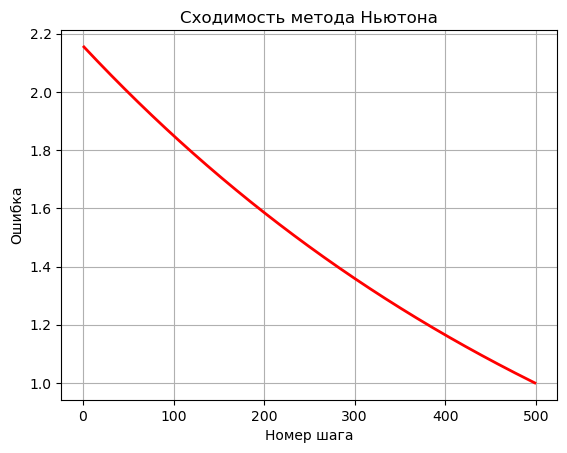

In [164]:
plt.title('Сходимость метода Ньютона')
plt.xlabel('Номер шага')           
plt.ylabel('Ошибка') 
plt.plot(iters_num, y, 'r', linewidth = 2)
plt.grid()
pass

$Аналогично$ для второй функции

In [165]:
x_arr2 = []
iters_num = np.arange(1, 500)

for i in iters_num:
#     root = newton(eq2, 1, maxiter=i, disp=0)
    root = newton(eq2, 1, fprime=eq2_derivative1, maxiter=i, fprime2=eq2_derivative2, disp=0)
    # Аналитически вычисляем корень второго уравнения: x=0  => чтобы получить ошибку, вычитать ничего не нужно
    x_arr2.append(root)
y2 = np.logspace(x_arr2[0], x_arr2[len(x_arr2)-1],num=len(x_arr2))

$График$

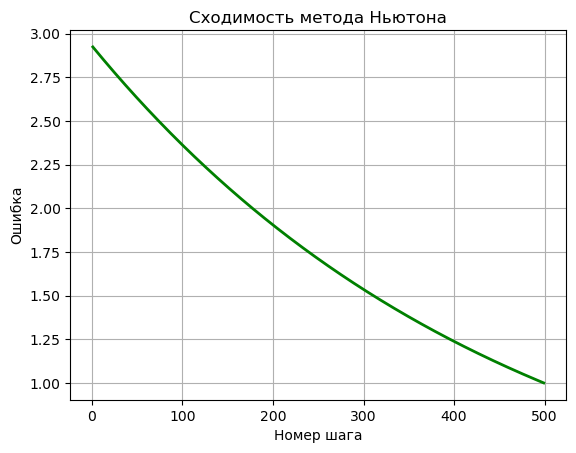

In [166]:
plt.title('Сходимость метода Ньютона')
plt.xlabel('Номер шага')           
plt.ylabel('Ошибка') 
plt.plot(iters_num, y2, 'g', linewidth = 2)
plt.grid()
pass

#### Экспериментально доказано, что в обоих случаях итерации сходятся линейно, а не квадратично. 
Теперь попробую доказать это теоретически.

## Теоретическое доказательство

Согласно методу Ньютона, чтобы численно решить уравнение $f(x) = 0$ методом простой итерации, его необходимо привести к эквивалентному уравнению: $x=\varphi(x)$, где $\varphi$  — сжимающее отображение.

 Функция $\varphi(x)$ определяется:
$$
\varphi(x)=x-\frac{f(x)}{f'(x)}
$$

#### Для первого уравнения имеем:
$$
(x-1)^2=0
$$

$$
f(x) = (x-1)^2
$$

$$
f'(x) = 2(x-1)
$$

$$
x-\frac{f(x)}{f'(x)} = x - \frac{(x-1)^2}{2(x-1)} = x - \frac{x-1}{2} = \frac{x+1}{2}
$$

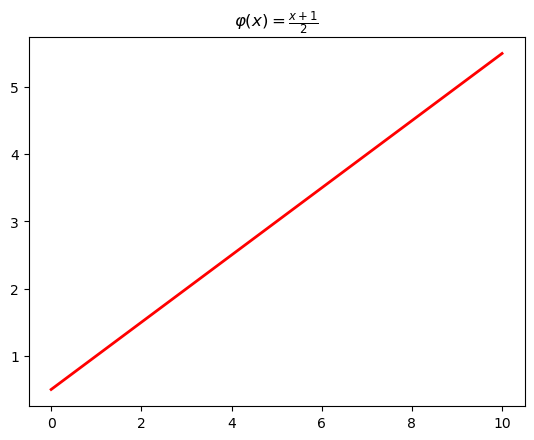

In [170]:
y = []
x = np.arange(0, 11)

def f(x):
    return x-(x-1)/2

for x0 in x:
    y.append(f(x0))

plt.title(r'$\varphi(x) = \frac{x+1}{2}$')
plt.plot(x, y, 'r', linewidth = 2)
pass

#### Для второго уравнения имеем:
$$
e^{2x} - 2e^x + 1 = 0
$$

$$
f(x) = e^{2x} - 2e^x + 1 = (e^{x}-1)^2
$$

$$
f'(x) = 2e^{2x} - 2e^x = 2e^{x}(e^{x}-1)
$$

$$
x-\frac{f(x)}{f'(x)} = x - \frac{(e^{x}-1)^2}{2e^{x}(e^{x}-1)} = x - \frac{e^{x}-1}{2e^{x}}
$$

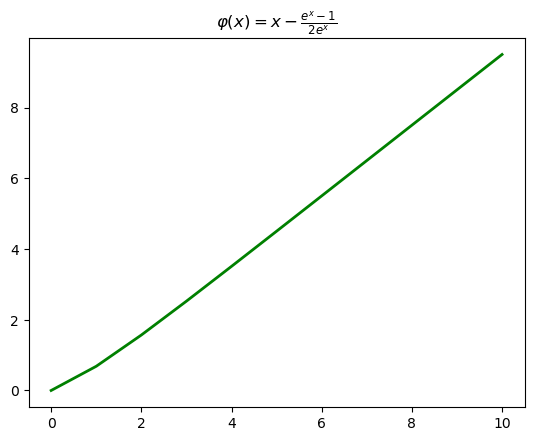

In [171]:
y = []
x = np.arange(0, 11)

def f(x):
    return x-(math.exp(x)-1)/(2*math.exp(x))

for x0 in x:
    y.append(f(x0))
    
plt.title(r'$\varphi(x) = x - \frac{e^{x}-1}{2e^{x}}$')
plt.plot(x, y, 'g', linewidth = 2)
pass

#### Итерации сходятся линейно, а не квадратично. ЧТД.

## Вывод: 
 Применив метод Ньютона к решению предложенных уравнений, мне удалось показать экспериментально и теоретически, что итерации сходятся линейно, а не квадратично.